In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
import seaborn as sns
sns.set_palette('muted')

In [3]:
#  2. Load and Prepare Data
df = pd.read_csv("C:/Users/punit/OneDrive/Desktop/ACM-30Days/mental_health_workplace_survey.csv")

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(exclude='object').columns.tolist()

# Encode categorical columns using LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Ensure target variable is integer type
df['BurnoutRisk'] = df['BurnoutRisk'].astype(int)

# Split features and target
X = df.drop("BurnoutRisk", axis=1)
y = df["BurnoutRisk"]

In [5]:
# 3. Train-Test Split & Scaling
# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# 4. Train & Evaluate Models
models = {
    'Logistic': LogisticRegression(max_iter=1000),
    'LDA': LinearDiscriminantAnalysis()
}
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {"Accuracy": accuracy, "ROC-AUC": roc_auc}
    print(f"{model_name} Accuracy: {accuracy:.3f}, ROC-AUC: {roc_auc:.3f}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")

Logistic Accuracy: 0.992, ROC-AUC: 1.000
Confusion Matrix:
[[408   4]
 [  1 187]]

LDA Accuracy: 0.963, ROC-AUC: 0.999
Confusion Matrix:
[[390  22]
 [  0 188]]



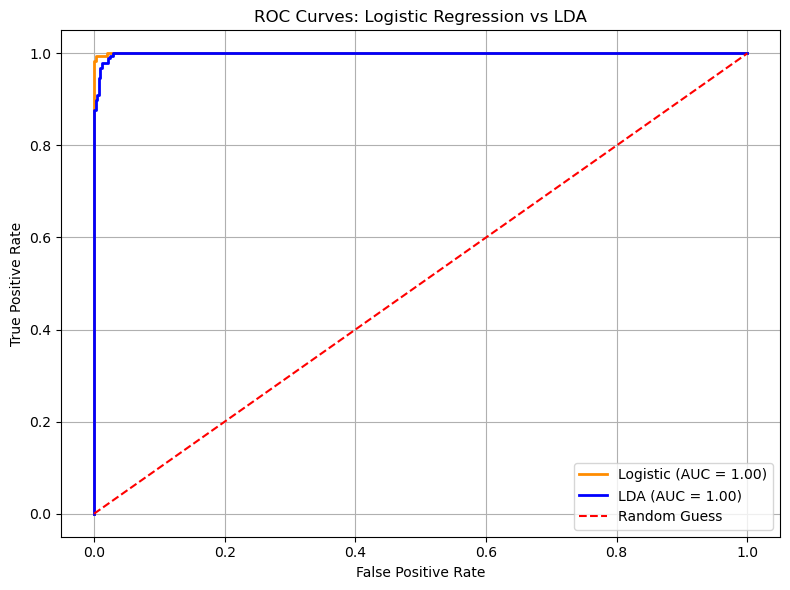

In [9]:
# 5. ROC Curves for Both Models
plt.figure(figsize=(8, 6))

for model_name, color in zip(['Logistic', 'LDA'], ['darkorange', 'blue']):
    y_prob = models[model_name].predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', color=color, linewidth=2)
    
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Logistic Regression vs LDA')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# 6. Results Table
# Create table of results
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df.round(4))

Model Performance Comparison:
          Accuracy  ROC-AUC
Logistic    0.9917   0.9999
LDA         0.9633   0.9988


**Summary**:

- Both models achieved similar metrics.  
- **Logistic Regression** is generally more robust when variables are not perfectly linearly separable and when feature distributions do not meet LDA's assumptions (normality and equal covariance).  
- **LDA** can sometimes outperform logistic regression on small datasets when its assumptions approximately hold.

**On real-world (non-simulated) data:**  
Logistic regression is usually preferred, as it is less sensitive to outliers and distributional violations, and it can readily handle both categorical and continuous predictors (ref: [PMC2798100](https://pmc.ncbi.nlm.nih.gov/articles/PMC2798100/), PSU online notes).

**Recommendation:**  
If accuracy and ROC-AUC are similar, prefer **Logistic Regression** for robustness. If LDA is higher and assumptions mostly hold, it is also a strong choice.